<h1 style="text-align: center; color: #00000; font-family: Arial, sans-serif;">
Let's Play Some Music!
</h1>
<p style="text-align: center; font-style: italic; font-size: 18px;">
Exploring Music Streaming Trends: Springfield vs. Shelbyville 
</p>

---

# Introduction

In this project, we will analyze music streaming data to understand user behavior differences in the cities of Springfield and Shelbyville. As a Data Analyst, our objective is to extract insights that can help inform decisions based on data patterns.

---

# Objective
The primary hypothesis to test is:
1. **User activity differs depending on the day of the week and the user's city**.

# Project Outline
The project will proceed in three main stages:
1. **Data Description** - Understanding the dataset's structure and contents.
2. **Data Preprocessing** - Cleaning and preparing the data for analysis.
3. **Hypothesis Testing** - Testing the hypothesis by comparing user behavior.


---


# Data Description 


## 1. Dictionary

**`Music DataFrame`**

- **`userID`**: Unique identifier for each user.
- **`Track`**: The name of the track (song) played by the user. 
- **`artist`**: The artist of the track. 
- **`genre`**: The genre of the track. 
- **`City`**: The city where the track was played, based on the user’s location	("Shelbyville" or "Springfield").
- **`time`**: The exact time the track was played.
- **`Day`**: The day of the week when the track was played, stored as a string ("Monday", "Wednesday", or "Friday").

### 1.1 Libraries

In [1]:
# Import the pandas library to work with data in DataFrame format
# Libraries for plotting 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Read Music Project cvs and creat the DataFrame 'df_music'

df_music = pd.read_csv('music_project.csv')

In [3]:
# Display the first rows to get an overview of the data

print('First rows of Music DataFrame:')
df_music.head(20)

First rows of Music DataFrame:


,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
5,842029A1,Chains,Obladaet,rusrap,Shelbyville,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Springfield,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Springfield,20:47:49,Wednesday
8,8FA1D3BE,L’estate,Julia Dalia,ruspop,Springfield,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Shelbyville,21:20:49,Wednesday


In [4]:
# Get general information about the data

print('Info. about the Music DataFrame:\n')
df_music.info()

Info. about the Music DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63736 non-null  object
 2   artist    57512 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


**Review of the quality of the Music DataFrame**:

- The DataFrame contains seven columns. 
- It has 65079 rows (entries). 
- They store the same data types: `object`.

According to the documentation:
- `' userID'`: user identifier;
- `'Track'`: song title;
- `'artist'`: artist name;
- `'genre'`: track genre;
- `' City'`: user city;
- `'time'`: exact time the song was played;
- `'Day'`: day of the week.

We can correct the following aspects:

1. Some names are in uppercase, they should be changed to lowercase.
2. There are spaces in some column names.
3. `' userID' having more than two words should be written with '_' to separate them, like this: 'user_id'`.
4. The **data types** of `time` and `day` should be changed to `datetime`.
5. **NaN:** 
   - `userID`, `City`, `time`, and `Day`:: 65,079 non-null values – No missing values.
   - `Track`: 63,736 non-null values – 1,343 missing values.
   - `artist`: 57,512 non-null values – 7,567 missing values.
   - `genre`: 63,881 non-null values – 1,198 missing values.
   


## 2. Data preprocessing

The goal is to prepare the data for analysis.
The first step is to resolve any issues with the headers. Then move on to missing values and look for duplicate values. 

### 2.1 Names of the columns 

In [5]:
# Display the table headers (the column names):
print("Names of the columns:")
print(df_music.columns.tolist()) 

Names of the columns:
['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day']


In [6]:
# For loop to iterate over the column names and make all characters lowercase

new_col_names =[]
for old_names in df_music.columns: 
    new_col_names.append(old_names.lower())
    
df_music.columns = new_col_names

# Results
print("All names in lowercase:")
print(df_music.columns.tolist())

All names in lowercase:
['  userid', 'track', 'artist', 'genre', '  city  ', 'time', 'day']


In [7]:
# For loop through headers removing spaces

new_col_names =[]
for old_names in df_music.columns: 
    new_col_names.append(old_names.strip())
    
df_music.columns = new_col_names

# Results
print("All names stripped:")
print(df_music.columns.tolist())

All names stripped:
['userid', 'track', 'artist', 'genre', 'city', 'time', 'day']


In [8]:
# Rename the "userid" column

df_music = df_music.rename(columns={'userid': 'user_id'})

# Results
print("Rename 'userid' to 'user_id':")
print(df_music.columns.tolist())

Rename 'userid' to 'user_id':
['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day']


In [9]:
# Check if the names are changed correctly

columns = df_music.columns.tolist()

# Results
print('New columns names:')
print(columns)

New columns names:
['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day']


### 2.2 Missing Values 
First, the number of missing values ​​in the table is found.

In [10]:
# Calculate the total number of missing values

missing_values_columns = df_music.isnull().sum()
total_missing_values = missing_values_columns.sum()

# Results
print("Missing values by columns:")
print(missing_values_columns[missing_values_columns > 0])  # Display columns with missing values only
print(f"\nTotal missing values overall: {total_missing_values}")  

Missing values by columns:
track     1343
artist    7567
genre     1198
dtype: int64

Total missing values overall: 10108


Not all missing values ​​affect the research. For example, missing values ​​in `track` and `artist` are not crucial. They can be replaced with default values ​​such as the string `'unknown'`.

But missing values ​​in `'genre`` can affect the comparison between Springfield and Shelbyville's music preferences. In real life, it would be useful to know the reasons for missing data and try to recover it. But we don't have that opportunity in this project. What we will do:
- fill these missing values ​​with a default value;
- evaluate how much the missing values ​​might affect your computations.

Replace missing values ​​in `'track'`, `'artist'` and `'genre'` columns with the string `'unknown'`

In [11]:
# For loop through headers replacing missing values with 'unknown'

for column in df_music.columns:
    df_music[column] = df_music[column].fillna('unknown')

print('DataFrame without missing values:')
df_music.head(15)

DataFrame without missing values:


,user_id,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
5,842029A1,Chains,Obladaet,rusrap,Shelbyville,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Springfield,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Springfield,20:47:49,Wednesday
8,8FA1D3BE,L’estate,Julia Dalia,ruspop,Springfield,09:17:40,Friday
9,E772D5C0,Pessimist,unknown,dance,Shelbyville,21:20:49,Wednesday


The result is now checked to ensure that there are no missing values ​​in the data set after the replacement. To do this, the missing values are counted again.

In [12]:
# Recalculate the total number of missing values

missing_values_columns = df_music.isnull().sum()

# Results
print(f"Total of missing values: \n{missing_values_columns}")  

Total of missing values: 
user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64


### 2.3 Duplicates


In [13]:
# Find the number of explicit duplicates

duplicates = df_music.duplicated()
total_duplicates = df_music.duplicated().sum() 

# Results 
print(f"Total duplicates: {total_duplicates}")  

Total duplicates: 3826


In [14]:
# Drop duplicates

df_music.drop_duplicates(inplace=True)

print(f"Total duplicates: {total_duplicates}")  

Total duplicates: 3826


Let's now check if all duplicates were successfully removed. Counting the explicit duplicates once more to ensure that they were all removed:

In [15]:
# Count the explicit duplicates one more time to make sure you've removed them all:
duplicates_check = df_music.duplicated()
total_duplicates_check = df_music.duplicated().sum() 

# Results 
print(f"Total duplicates: {total_duplicates_check}")  

Total duplicates: 0


The `genre` column is now checked for duplicates or misspelled names

In [16]:
# List of unique gender names, sorted alphabetically

# Extract the genre column
genre_column = df_music['genre']

# Get unique genre names and sort them alphabetically
unique_genres_sorted = sorted(genre_column.unique())

# Results
print("Unique genres in alphabetical order:")
print(unique_genres_sorted)

Unique genres in alphabetical order:
['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans', 'alternative', 'ambient', 'americana', 'animated', 'anime', 'arabesk', 'arabic', 'arena', 'argentinetango', 'art', 'audiobook', 'avantgarde', 'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass', 'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks', 'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean', 'caucasian', 'celtic', 'chamber', 'children', 'chill', 'chinese', 'choral', 'christian', 'christmas', 'classical', 'classicmetal', 'club', 'colombian', 'comedy', 'conjazz', 'contemporary', 'country', 'cuban', 'dance', 'dancehall', 'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr', 'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo', 'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic', 'electropop', 'emo', 'entehno', 'epicmetal', 'estrada', 'ethnic', 'eurofolk', 'european', 'experimental', 'extrememetal', 'fado', 'film', 'f

The above list shows that there are duplicates of the genre `hiphop`.
Written as follows:
* `hip`
* `hop`
* `hip-hop`

With the function called `replace_wrong_genres()` and with two parameters:
* `wrong_genres=`: this is a list containing all the values ​​to replace.
* `correct_genre=`: this is a string to be used as a replacement.

As a result, the function should correct the names in the `genre` column of the `df_music` table, i.e. replace each value in the `wrong_genres` list with the value in `correct_genre`.

A `for` loop is used to iterate over the list of incorrect genres, extract the `genre` column, and apply the `replace` method to make corrections.

In [17]:
# Define a function to replace incorrect genre names in a DataFrame column
def replace_wrong_genres(df, column_name, equivalences: dict):
    # Loop through the equivalences dictionary and replace each incorrect genre with the correct one
    for correct_genre, wrong_genres in equivalences.items():
        df[column_name] = df[column_name].replace(wrong_genres, correct_genre)
    # Return the modified column with corrected genre names
    return df[column_name]

# Dictionary of implicit duplicates to be replaced
equivalences = {"hiphop": ['hip-hop', 'hip', 'hop']}

# Apply the function to replace incorrect genre names in the "genre" column of df_music
df_music["genre"] = replace_wrong_genres(df_music, column_name="genre", equivalences=equivalences)

# Extract the "genre" column from df_music
genre_column = df_music['genre']

# Get a sorted list of unique genres to check for implicit duplicates
unique_genres = sorted(genre_column.unique())

# Print the list of unique genres
print(unique_genres)  # Check for implicit duplicates

['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans', 'alternative', 'ambient', 'americana', 'animated', 'anime', 'arabesk', 'arabic', 'arena', 'argentinetango', 'art', 'audiobook', 'avantgarde', 'axé', 'baile', 'balkan', 'beats', 'bigroom', 'black', 'bluegrass', 'blues', 'bollywood', 'bossa', 'brazilian', 'breakbeat', 'breaks', 'broadway', 'cantautori', 'cantopop', 'canzone', 'caribbean', 'caucasian', 'celtic', 'chamber', 'children', 'chill', 'chinese', 'choral', 'christian', 'christmas', 'classical', 'classicmetal', 'club', 'colombian', 'comedy', 'conjazz', 'contemporary', 'country', 'cuban', 'dance', 'dancehall', 'dancepop', 'dark', 'death', 'deep', 'deutschrock', 'deutschspr', 'dirty', 'disco', 'dnb', 'documentary', 'downbeat', 'downtempo', 'drum', 'dub', 'dubstep', 'eastern', 'easy', 'electronic', 'electropop', 'emo', 'entehno', 'epicmetal', 'estrada', 'ethnic', 'eurofolk', 'european', 'experimental', 'extrememetal', 'fado', 'film', 'fitness', 'flamenco', 'folk', 'folklor

**The data have been processed for analysis, such as hypothesis testing.**

## 3. Hypothesis testing

### 3.1 Hipótesis: compare user behavior in the two cities

The hypothesis states that there are differences in the way users in Springfield and Shelbyville consume music. To test this, data from three days of the week is used: Monday, Wednesday, and Friday.

Next Steps: 
* Group users by city.
* Compare the number of songs each group played on Monday, Wednesday, and Friday.


In [18]:
# Group the data by city and count the number of songs played in each city
songs_per_city = df_music.groupby('city')['track'].count()

# Results
print("Total Songs Played by Each City:\n")
print(songs_per_city)

Total Songs Played by Each City:

city
Shelbyville    18512
Springfield    42741
Name: track, dtype: int64


**Observations**:
Springfield has more than twice as many views as Shelbyville.

In [19]:
# Calculate the songs played on each of the three days
songs_per_day = df_music.groupby(by='day')['track'].count()[['Monday', 'Wednesday', 'Friday']]

# Results
print("Total Songs Played by Day:\n")
print(songs_per_day)


Total Songs Played by Day:

day
Monday       21354
Wednesday    18059
Friday       21840
Name: track, dtype: int64


**Observations**:
`Friday` is the day with the most songs played, followed by `Monday`, and the day with the least is `Wednesday`.

A function is written that can count entries by both criteria simultaneously.

The function `number_tracks()` is created to calculate the number of songs played on a given day and city. The function has two parameters:

- `day`: a day of the week to filter on. For example, `'Monday'`.
- `city`: a city to filter on. For example, `'Springfield'`.

Inside the function, consecutive filtering is applied with logical indexing.

The data is first filtered by day and then the resulting table is filtered by city.

After filtering the data by two criteria, the number of values in the column `'user_id'` in the resulting table is counted. This count represents the number of entries that were searched. The result is saved in a new variable and returned from the function.

In [20]:
# Define a function to count the number of tracks played on a given day in a specific city
def number_tracks(day, city):
    # Filter the DataFrame for rows that match the specified day and city
    filtered = df_music[(df_music['day'] == day) & (df_music['city'] == city)]
    
    # Count the number of unique 'user_id' entries in the filtered data
    count_user_id = filtered['user_id'].count()
    
    # Return the count
    return count_user_id
    
#The function number_tracks() is called six times in total, 
# once for each combination of the three days (Monday, Tuesday, Wednesday) 
# and two cities (Springfield and Shelbyville), to obatain the results needed.

# Define the days and cities
days = ['Monday', 'Wednesday', 'Friday']
cities = ['Springfield', 'Shelbyville']

# Loop through each day and city, count the tracks, and print the results
for day in days:
    for city in cities:
        result = number_tracks(day, city)
        print(f"The number of songs played in {city} on {day} is: {result}")

The number of songs played in Springfield on Monday is: 15740
The number of songs played in Shelbyville on Monday is: 5614
The number of songs played in Springfield on Wednesday is: 11056
The number of songs played in Shelbyville on Wednesday is: 7003
The number of songs played in Springfield on Friday is: 15945
The number of songs played in Shelbyville on Friday is: 5895


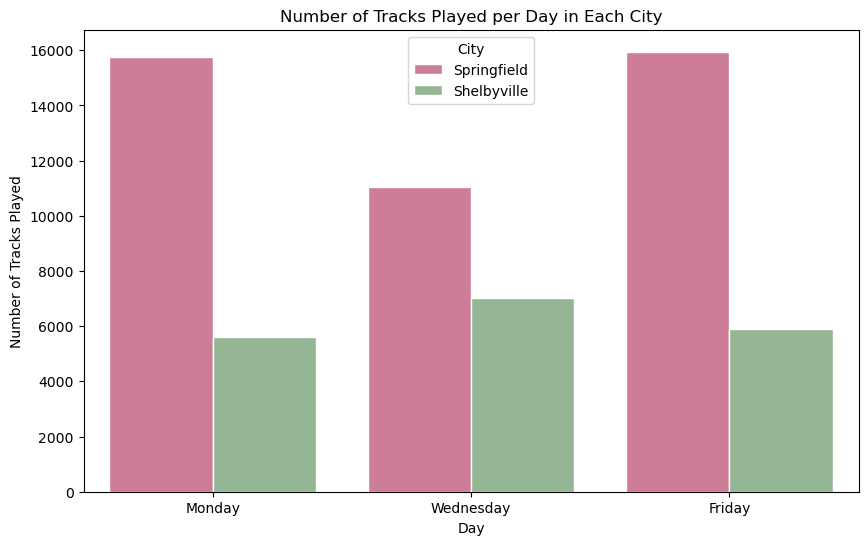

In [21]:
# Define a list to store the results
results = []

# Loop through each day and city, count the tracks, and append to the results list
for day in days:
    for city in cities:
        count = number_tracks(day, city)
        results.append({'day': day, 'city': city, 'track_count': count})

# Convert the results list into a DataFrame
music_total_results = pd.DataFrame(results)

# Create a bar plot using seaborn with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(data=music_total_results, x='day', y='track_count', edgecolor = 'white', hue='city', palette={'Springfield': 'palevioletred', 'Shelbyville': 'darkseagreen'})
plt.title('Number of Tracks Played per Day in Each City')
plt.xlabel('Day')
plt.ylabel('Number of Tracks Played')
plt.legend(title='City')
plt.show()



**Results**:

1. **Springfield has higher song play counts**: For each day, Springfield consistently has more songs played than Shelbyville. For example, on **Monday**, Springfield had 15,740 songs played, while Shelbyville only had 5,614. This trend continues across the other days as well.

2. **Monday and Friday are the busiest days**: Both cities experience the highest number of songs played on **Friday**, with Springfield leading at 15,945 and Shelbyville at 5,895. **Monday** is also busy, especially in Springfield, but the numbers are slightly lower compared to Friday.

3. **Wednesday has a decrease in song plays**: Compared to Monday and Friday, **Wednesday** shows a drop in song plays for both cities. Springfield dropped from 15,740 on Monday to 11,056 on Wednesday, and Shelbyville decreased from 5,614 to 7,003. 


The data shows that there are differences in the number of songs played between users in **Springfield** and **Shelbyville** across different days. This supports the hypothesis that **users in Springfield and Shelbyville consume music differently**.  This difference could be influenced by various factors such as the population size, cultural preferences, or even the time users have for listening to music.